In [3]:
#Calculating maximum_sub_array

import math
import numpy as np
import time
from matplotlib import pyplot as plt

def max_sub_array(array,low,high) :
    if high == low :
        return (low,high,array[low-1])
    else :
        mid = math.floor((low+high)/2)
        left_low,left_high,left_sum = max_sub_array(array,low,mid)
        right_low,right_high,right_sum = max_sub_array(array,mid+1,high)
        cross_low,cross_high,cross_sum = max_crossing_sub_array(array,low,mid,high)
        if left_sum >= right_sum and left_sum >= cross_sum :
            return left_low,left_high,left_sum
        elif right_sum >= left_sum and right_sum >= cross_sum :
            return right_low,right_high,right_sum
        else :
            return  cross_low,cross_high,cross_sum
    
def max_crossing_sub_array(array,low,mid,high) :
    left_sum = -np.inf
    sum = 0
    max_right = 0
    max_left = 0
    for i in range(mid,low-1,-1):
        sum = sum + array[i]
        if sum > left_sum :
            left_sum = sum
            max_left = i
    right_sum = -np.inf
    sum = 0
    for j in range(mid+1,high):
        sum = sum + array[j]
        if sum > right_sum :
            right_sum = sum
            max_right = j
    return max_left,max_right,left_sum+right_sum 
    
def main() :
    array = [12,-5,-30,37,12,-16,-28,22,-26,34,23,-45,23,11,-20,12,-22,10]
    low_ind,high_ind,sum_max = max_sub_array(array, 0, len(array))
    print("Maximum sum is",sum_max,"from index",low_ind,"to",high_ind, ".")

main()


Maximum sum is 58 from index 3 to 10 .


time_elapsed_array [1.77383423e-04 1.56378746e-03 1.73599720e-02 1.92928076e-01
 2.14097571e+00]
theoretical_complexity_array [3.45387764e-05 6.90775528e-04 1.03616329e-02 1.38155106e-01
 1.72693882e+00]


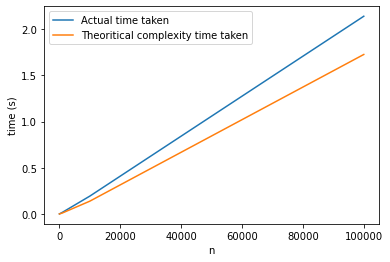

In [4]:
#Plotting theoretical complexity vs actual time

array_sizes = [10, 100, 1000, 10000, 100000]
c = 0.0000015

def prepare_arrays() :
    time_elapsed_array = []
    theoretical_complexity_array = []
    
    for i in range(0,len(array_sizes)) :
        n = array_sizes[i]
        array = np.random.randint(-1000, 1000, size=(n))
        time_start = time.time()
        max_sub_array_out =  max_sub_array(array,0,len(array))
        time_elapsed = time.time() - time_start
        time_elapsed_array = np.append(time_elapsed_array, time_elapsed)
        theoretical_complexity = c*n*np.log(n)
        theoretical_complexity_array = np.append(theoretical_complexity_array, theoretical_complexity)
    return time_elapsed_array, theoretical_complexity_array

time_elapsed_array, theoretical_complexity_array = prepare_arrays()
print("time_elapsed_array", time_elapsed_array)
print("theoretical_complexity_array", theoretical_complexity_array)

plt.plot(array_sizes, time_elapsed_array, label="Actual time taken")
plt.plot(array_sizes, theoretical_complexity_array, label="Theoritical complexity time taken")

plt.xlabel('n')
plt.ylabel('time (s)')    
plt.legend()
plt.show()

The actual time is close to the theoretical complexity but the difference seem to increase with n